In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data3 = pd.read_csv('/content/city_day.csv')

In [ ]:
data3

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [ ]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


<Axes: >

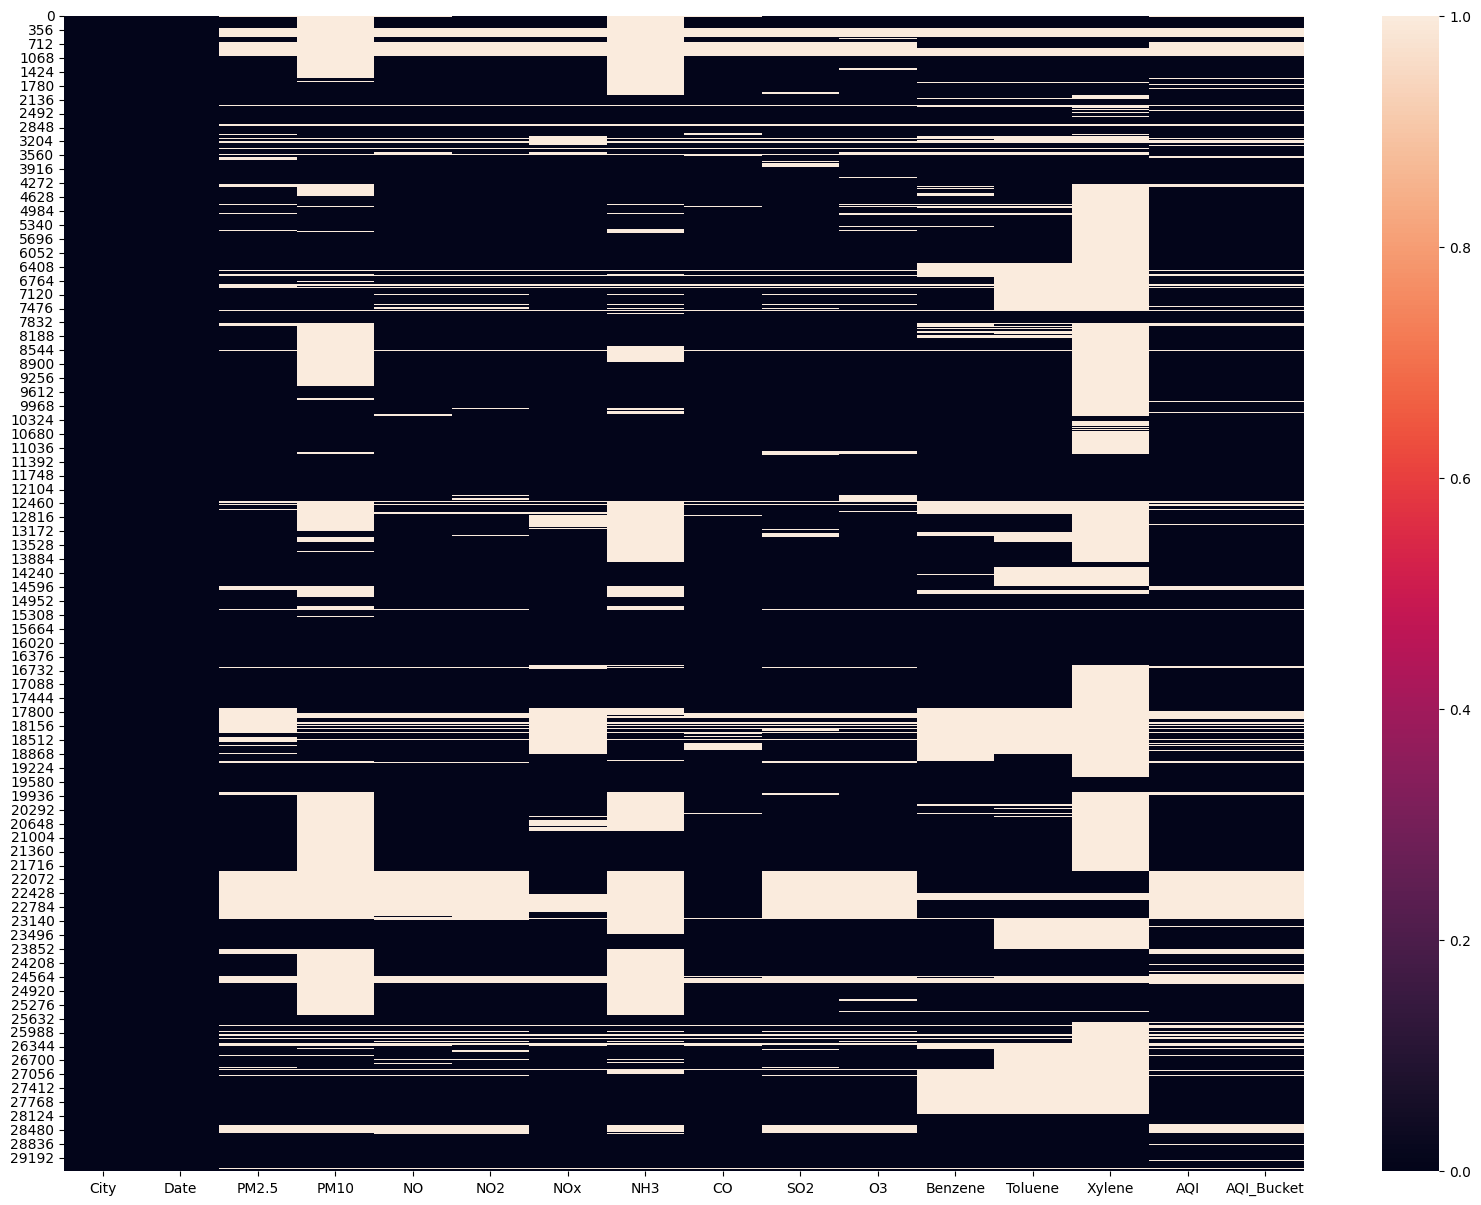

In [ ]:
plt.figure(figsize = (20,15))
sns.heatmap(data3.isnull())

In [ ]:
data3.isnull().sum()

,0
City,0
Date,0
PM2.5,4598
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854


In [ ]:
mode_value = data3['PM2.5'].mode()[0]
data3['PM2.5'].fillna(mode_value, inplace=True)


In [ ]:
features_with_null = ['PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']
data3[features_with_null]


,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN
1,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN
2,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN
3,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN
4,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
29526,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0
29527,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0
29528,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0
29529,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0


In [ ]:
for x in features_with_null:
  mode_value = data3[x].mode()[0]
  data3[x].fillna(mode_value, inplace=True)


In [ ]:
data3.isnull().sum()

,0
City,0
Date,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,0
NH3,0
CO,0
SO2,0


In [ ]:
data3.drop('AQI_Bucket',axis = 1,inplace = True)

<Axes: >

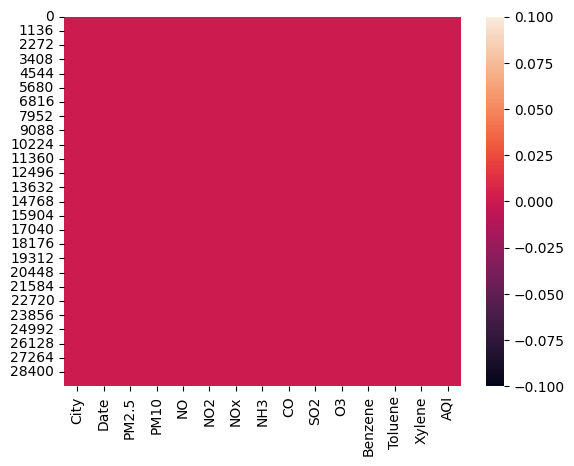

In [ ]:
sns.heatmap(data3.isnull())

([<matplotlib.axis.XTick at 0x7cb80440d540>,
 [Text(0, 0, '0'),
  Text(10, 0, '10'),
  Text(20, 0, '20'),
  Text(30, 0, '30'),
  Text(40, 0, '40'),
  Text(50, 0, '50'),
  Text(60, 0, '60'),
  Text(70, 0, '70'),
  Text(80, 0, '80'),
  Text(90, 0, '90'),
  Text(100, 0, '100'),
  Text(110, 0, '110'),
  Text(120, 0, '120'),
  Text(130, 0, '130'),
  Text(140, 0, '140')])

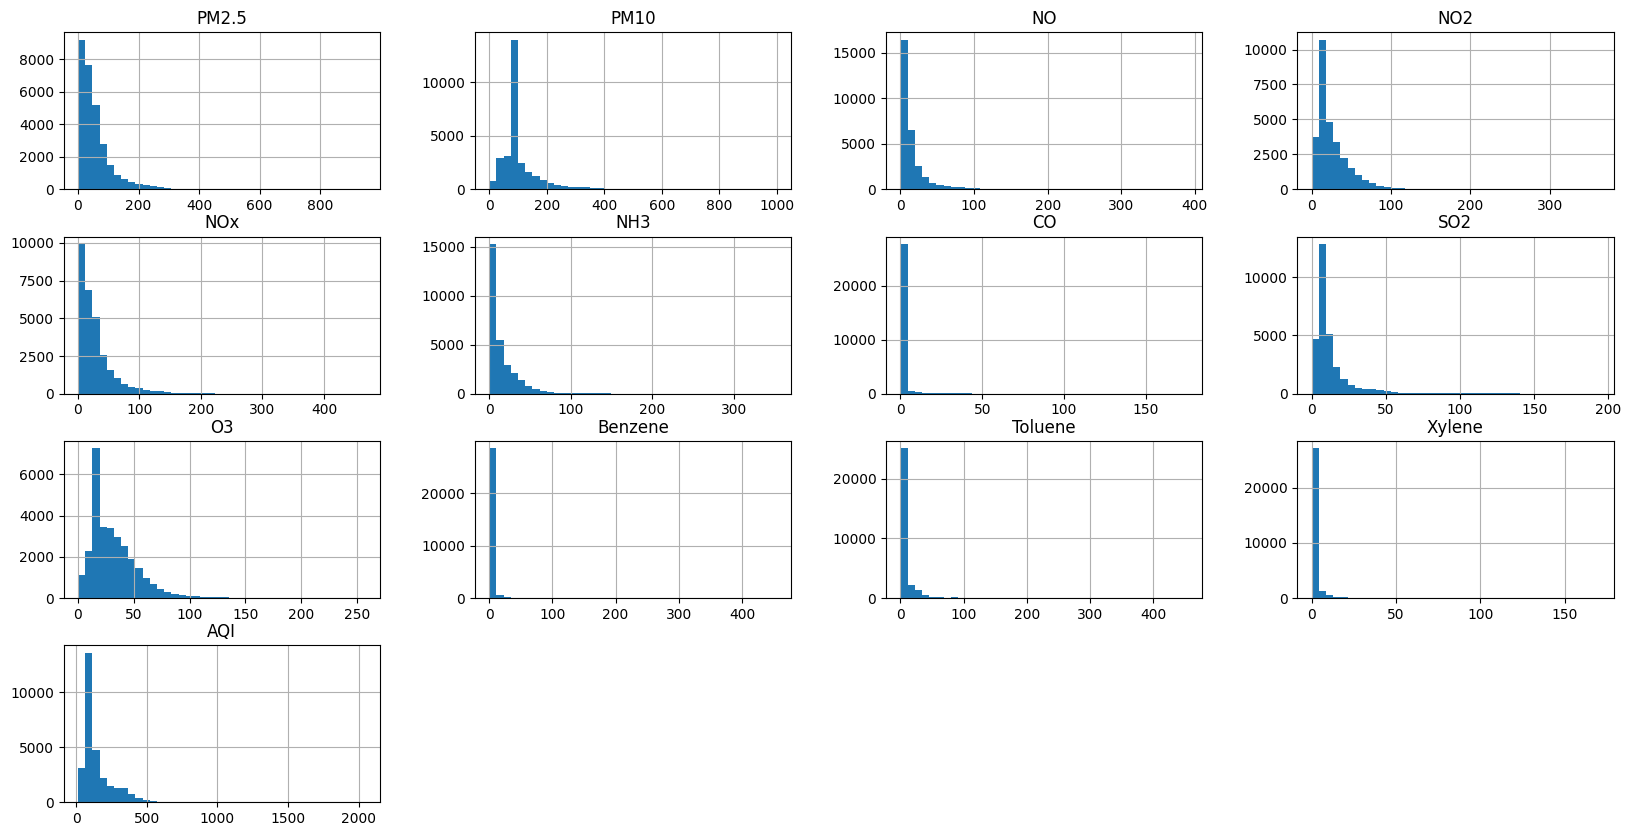

In [ ]:

data3.hist(figsize = (20,10),bins = 40)
plt.xticks(np.arange(0, 150, step=10))

<Axes: ylabel='Density'>

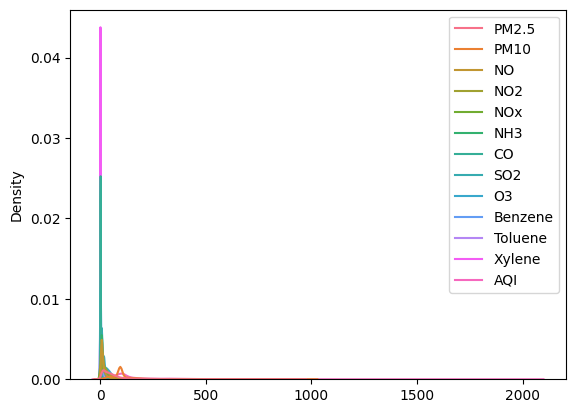

In [ ]:
sns.kdeplot(data = data3)


In [ ]:
column = data3.columns

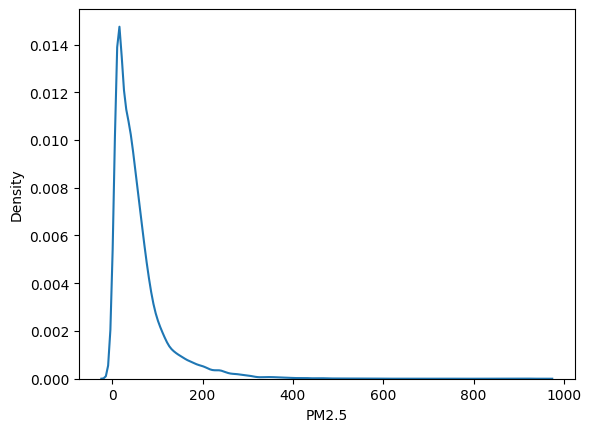

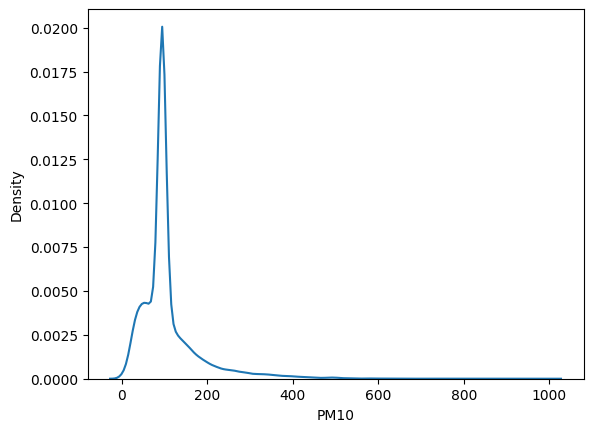

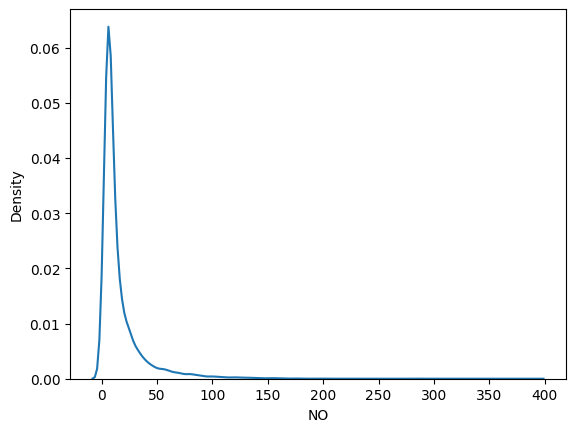

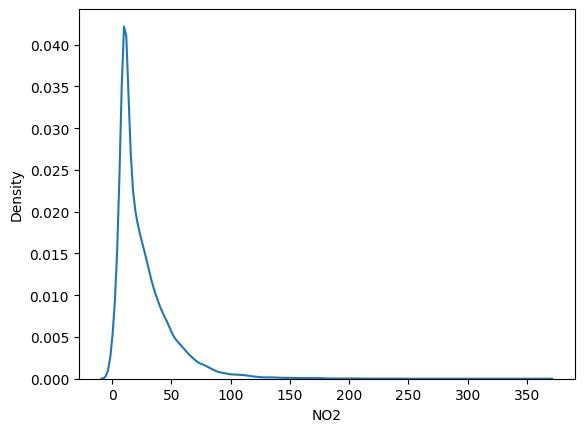

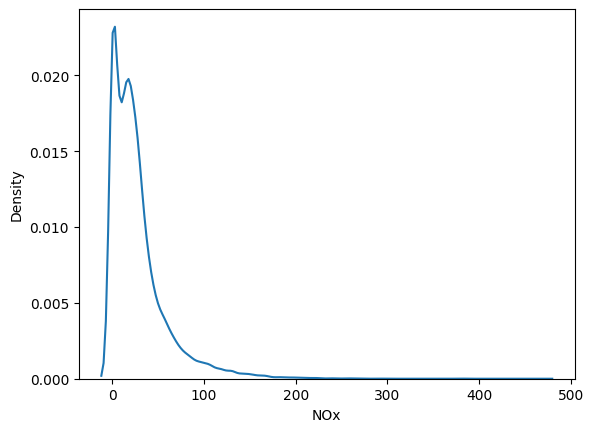

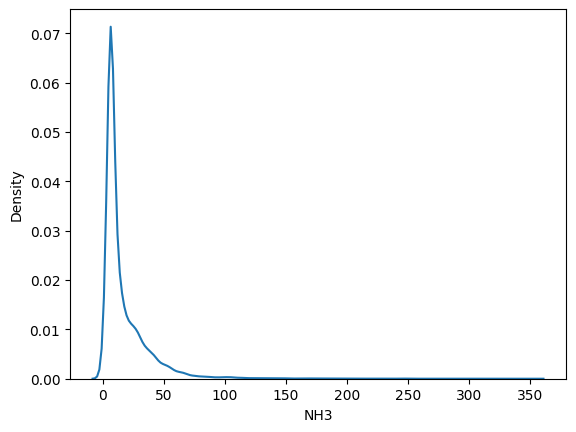

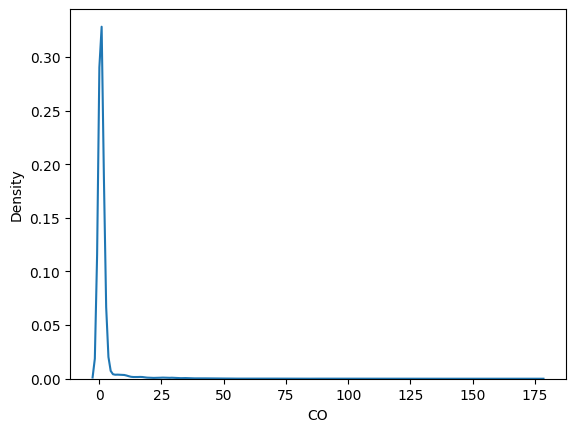

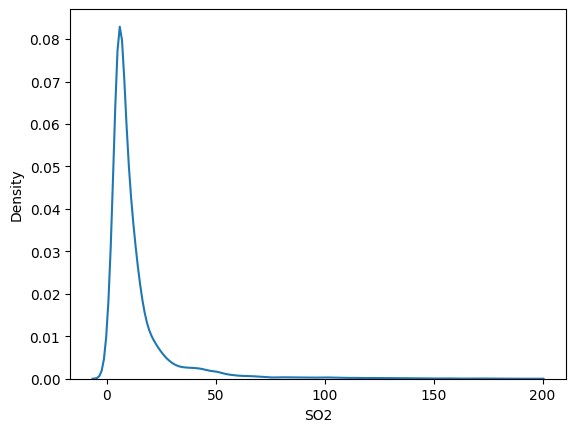

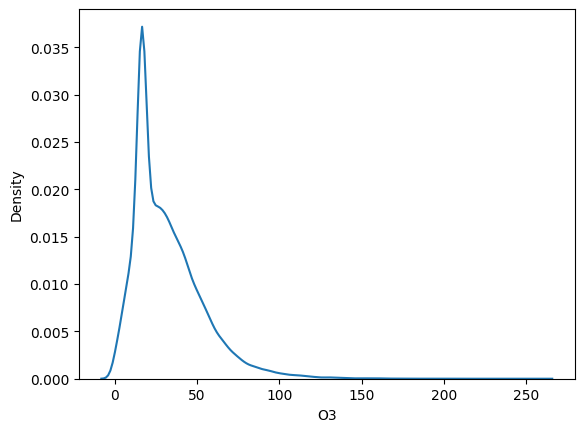

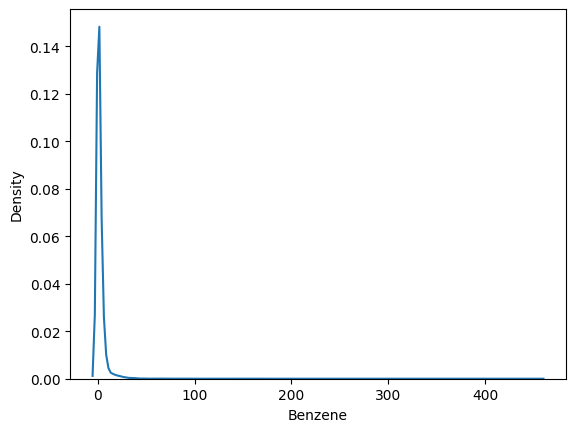

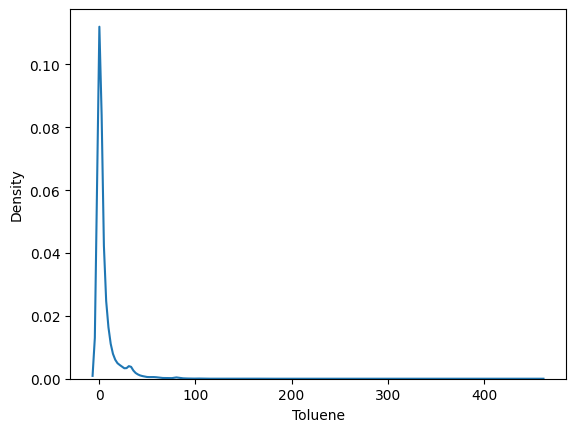

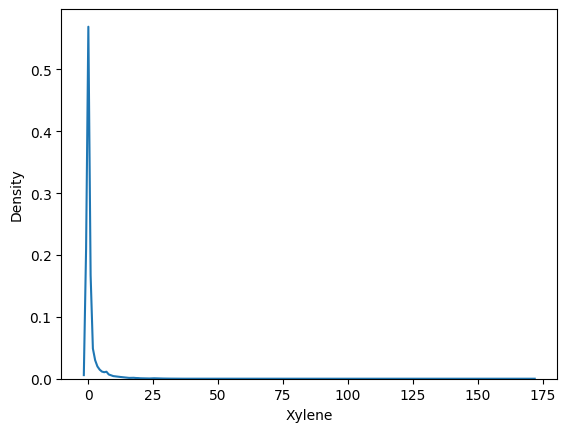

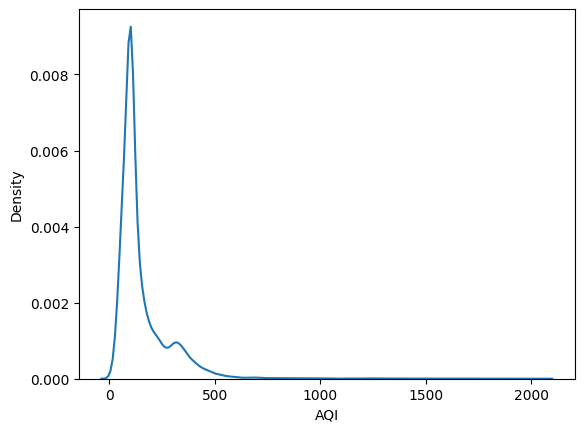

In [ ]:
for x in column[2:]:
  sns.kdeplot(data = data3 , x = x)
  plt.show()

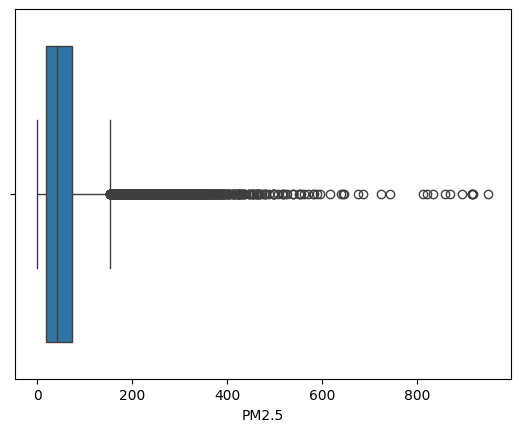

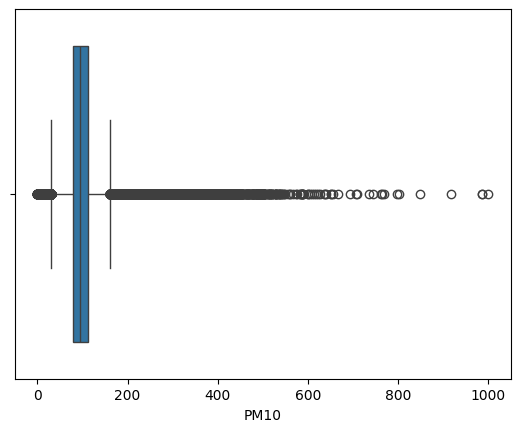

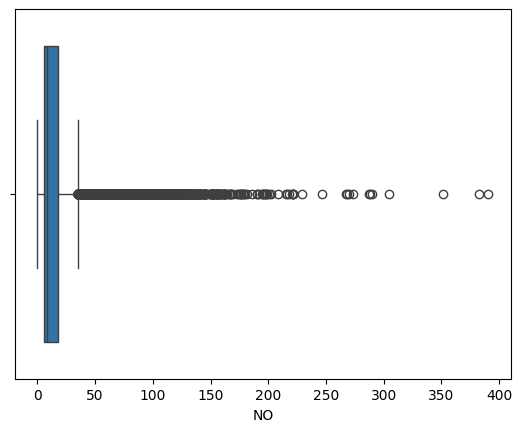

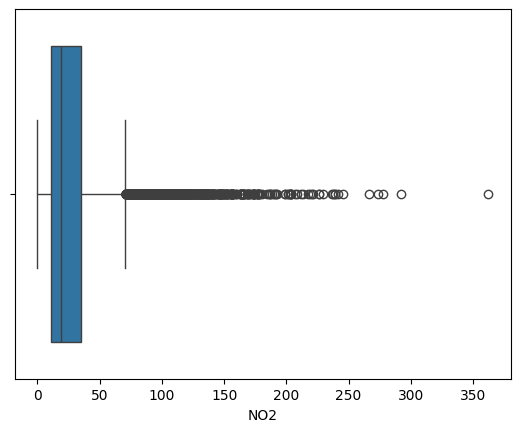

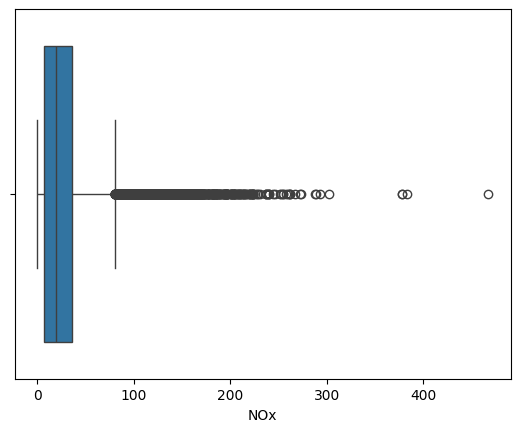

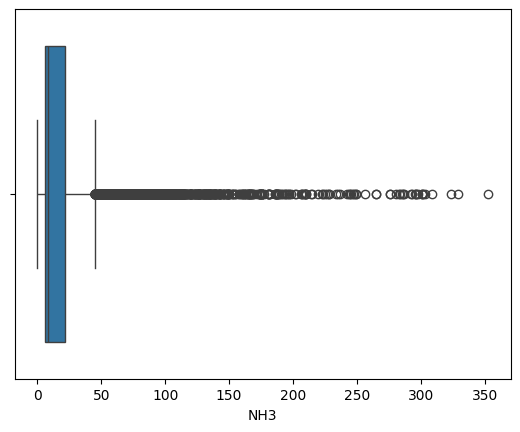

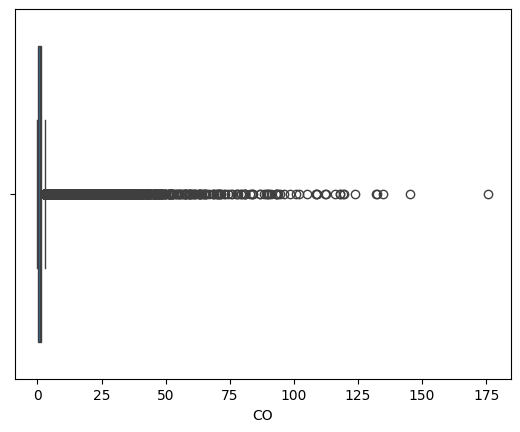

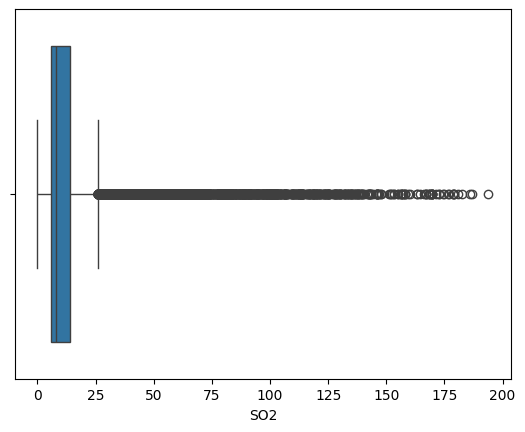

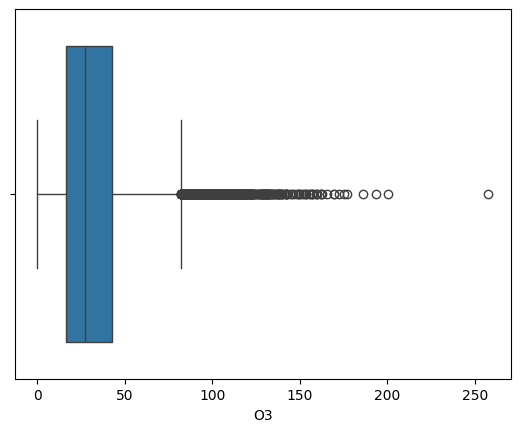

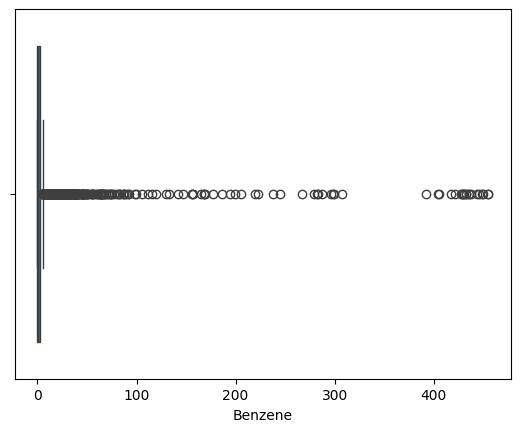

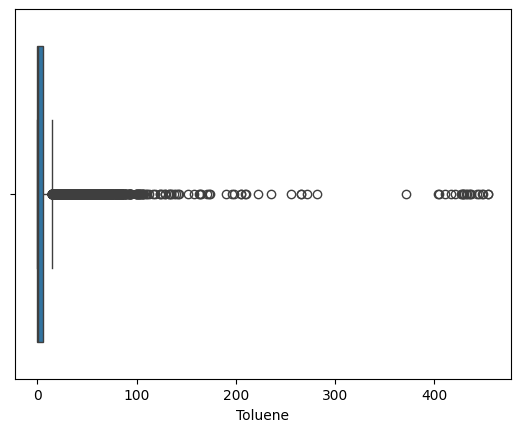

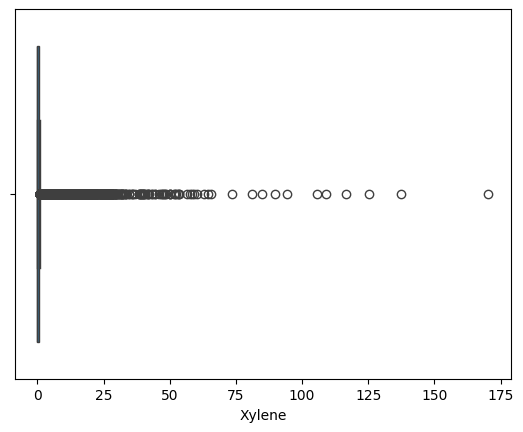

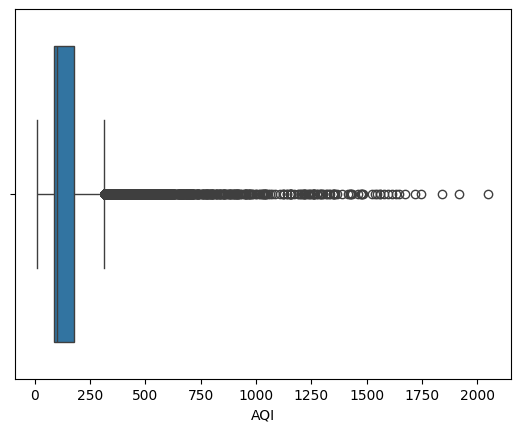

In [ ]:
for x in column[2:]:
  sns.boxplot(data = data3 , x = x)
  plt.show()

all the numerical features has outliers. lets treat them using IQR method


In [ ]:
#handling outliers
Q1 = data3[column[2:]].quantile(0.25)
Q3 = data3[column[2:]].quantile(0.75)

# IQR for all features
IQR = Q3 - Q1

In [ ]:
IQR

,0
PM2.5,54.060
PM10,32.565
NO,11.640
NO2,24.085
NOx,29.485
NH3,15.465
CO,0.980
SO2,8.070
O3,26.250
Benzene,2.420


In [ ]:
for x in column[2:]:
    lower_bound = Q1[x] - 1.5 * IQR[x]
    upper_bound = Q3[x] + 1.5 * IQR[x]
    data3[x] = data3[x].clip(lower=lower_bound, upper=upper_bound)

In [ ]:
print("Original shape:", data3.shape)
print("Number of outliers after capping:")
print(((data3[column[2:]] < (lower_bound)) | (data3[column[2:]] > (upper_bound))).sum())

Original shape: (29531, 15)
Number of outliers after capping:
PM2.5      0
PM10       0
NO         0
NO2        0
NOx        0
NH3        0
CO         0
SO2        0
O3         0
Benzene    0
Toluene    0
Xylene     0
AQI        0
dtype: int64


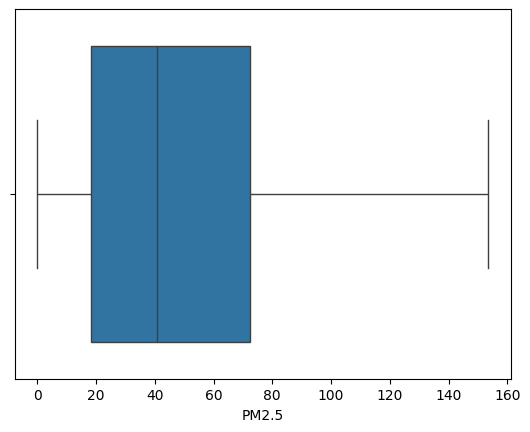

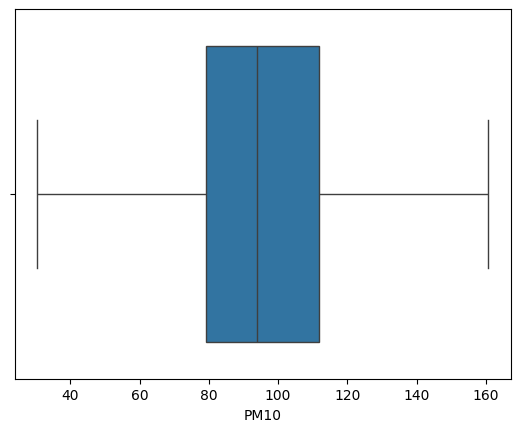

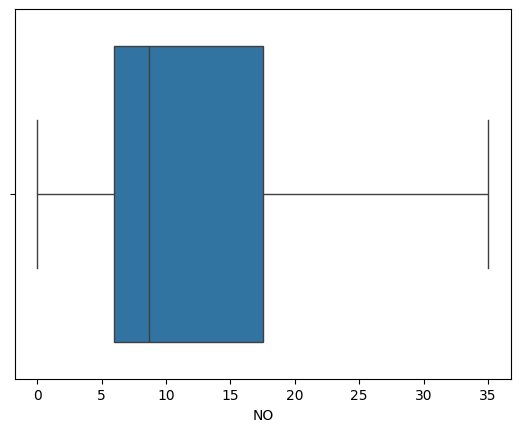

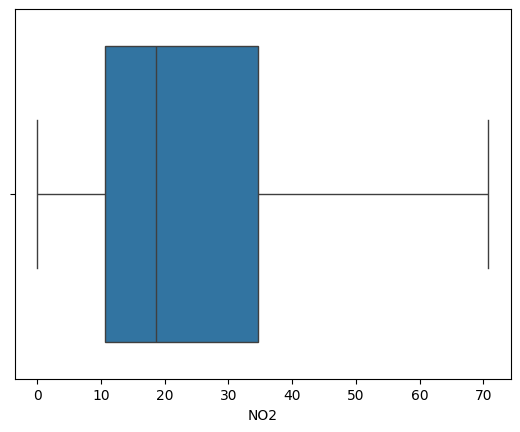

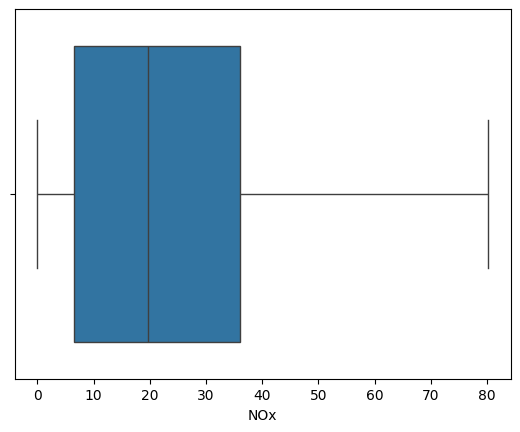

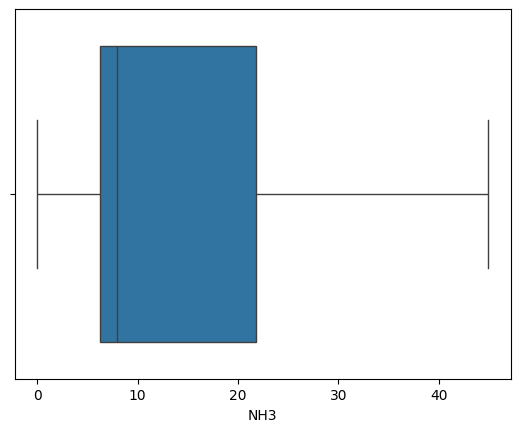

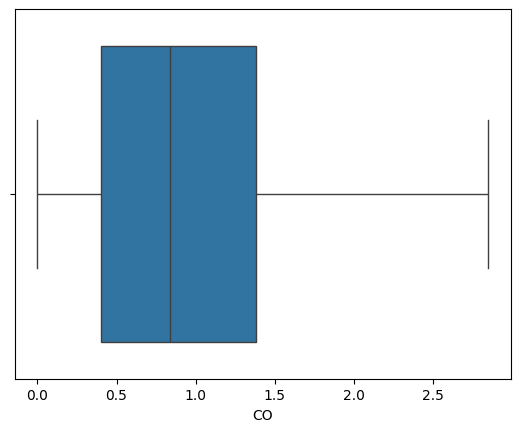

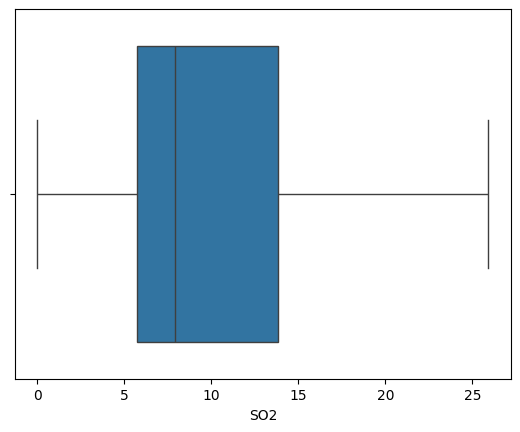

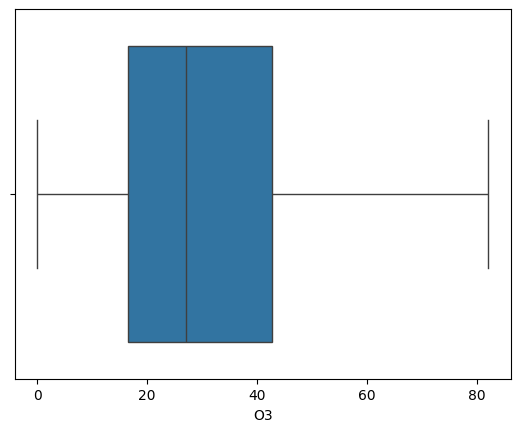

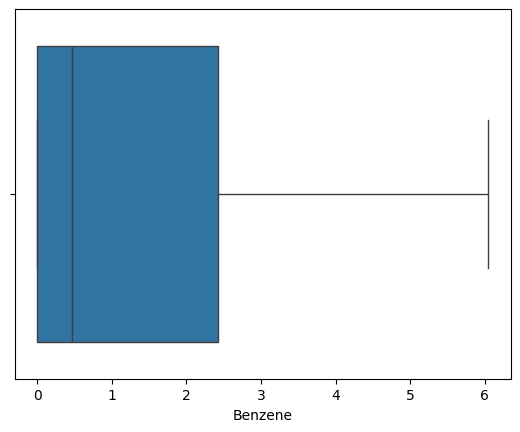

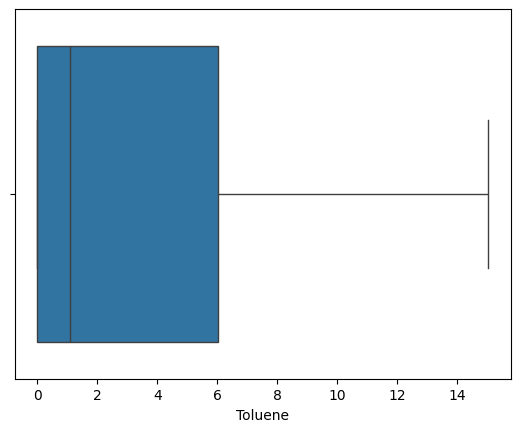

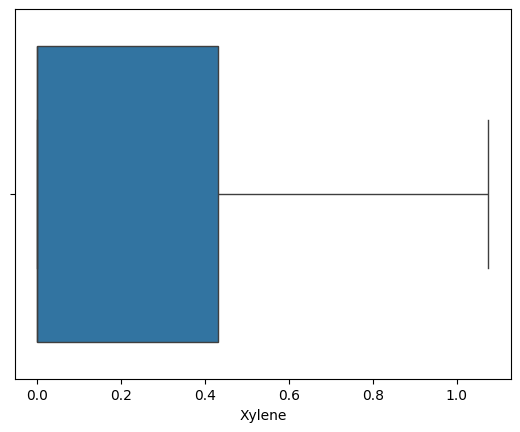

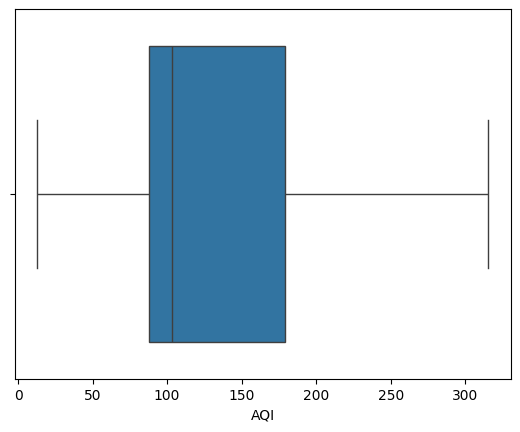

In [ ]:
for x in column[2:]:
  sns.boxplot(data = data3 , x = x)
  plt.show()

outliers has been treated effectively



In [ ]:
data3['Date'] = data3['Date'].replace("'",'',regex = False)
data3['Date'] = pd.to_datetime(data3['Date'])
#data3['Date'] = data3['Date'].astype(float)

In [ ]:
correlation = data3[column[1:]].corr()

In [ ]:
correlation

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
Date,1.000000,-0.073597,-0.115059,0.047697,-0.008754,0.065888,0.029313,-0.119122,0.141027,0.042582,0.083698,0.058469,0.092038,-0.158233
PM2.5,-0.073597,1.000000,0.531089,0.490498,0.509378,0.437212,0.259923,0.429203,0.286385,0.297794,0.309848,0.331791,0.161148,0.827120
PM10,-0.115059,0.531089,1.000000,0.402738,0.403814,0.374043,0.254444,0.191699,0.282335,0.239996,0.256303,0.237716,0.098321,0.567436
NO,0.047697,0.490498,0.402738,1.000000,0.536638,0.731424,0.242780,0.399813,0.366268,0.036153,0.347133,0.286553,0.198305,0.502293
NO2,-0.008754,0.509378,0.403814,0.536638,1.000000,0.636116,0.314567,0.356351,0.351224,0.360129,0.451671,0.535534,0.307357,0.507289
NOx,0.065888,0.437212,0.374043,0.731424,0.636116,1.000000,0.275523,0.398564,0.296947,0.145072,0.397528,0.363480,0.250707,0.446104
NH3,0.029313,0.259923,0.254444,0.242780,0.314567,0.275523,1.000000,0.104429,0.025051,0.164806,0.214654,0.186780,-0.042199,0.154699
CO,-0.119122,0.429203,0.191699,0.399813,0.356351,0.398564,0.104429,1.000000,0.366300,0.152834,0.272080,0.323099,0.189971,0.531314
SO2,0.141027,0.286385,0.282335,0.366268,0.351224,0.296947,0.025051,0.366300,1.000000,0.257150,0.241552,0.326061,0.258393,0.386171
O3,0.042582,0.297794,0.239996,0.036153,0.360129,0.145072,0.164806,0.152834,0.257150,1.000000,0.183905,0.288857,0.130753,0.271482


In [ ]:
data3.drop('Date',axis = 1,inplace = True)

Text(0.5, 1.0, 'heatmap of correlation matrix')

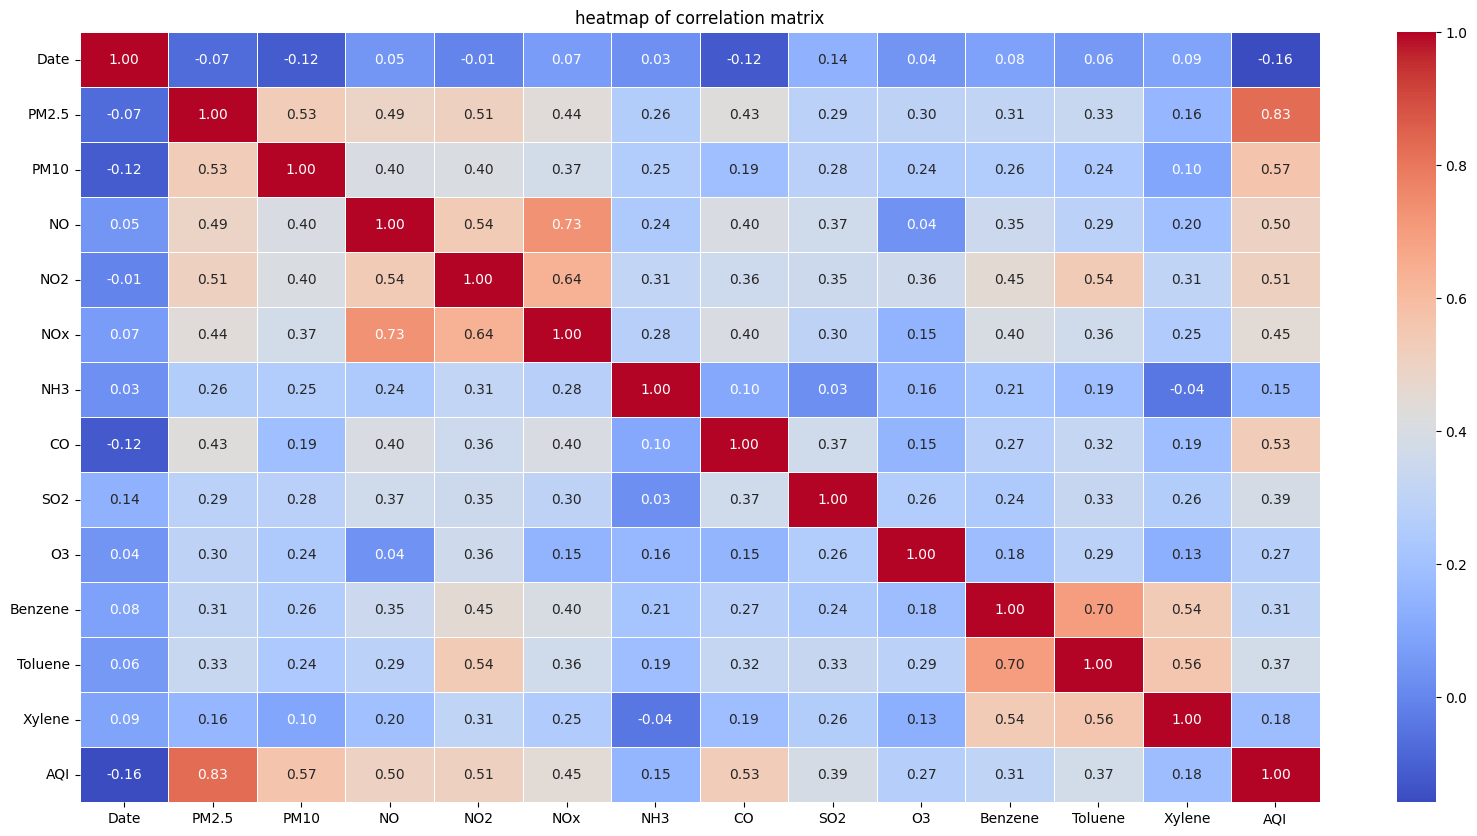

In [ ]:
plt.figure(figsize = (20,10))
sns.heatmap(correlation, annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5,
    #vmin=-1,
    #vmax=1
            )
plt.title('heatmap of correlation matrix')

In [ ]:
data3

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,Ahmedabad,11.00,94.00,0.92,18.22,17.15,6.29,0.92,25.915,82.105,0.00,0.02,0.000,102.0
1,Ahmedabad,11.00,94.00,0.97,15.69,16.46,6.29,0.97,24.550,34.060,3.68,5.50,1.075,102.0
2,Ahmedabad,11.00,94.00,17.40,19.30,29.70,6.29,2.85,25.915,30.700,6.05,15.05,1.075,102.0
3,Ahmedabad,11.00,94.00,1.70,18.48,17.97,6.29,1.70,18.590,36.080,4.43,10.14,1.000,102.0
4,Ahmedabad,11.00,94.00,22.10,21.42,37.76,6.29,2.85,25.915,39.310,6.05,15.05,1.075,102.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.550,23.300,2.24,12.07,0.730,41.0
29527,Visakhapatnam,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.720,30.140,0.74,2.21,0.380,70.0
29528,Visakhapatnam,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.420,30.960,0.01,0.01,0.000,68.0
29529,Visakhapatnam,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.840,28.300,0.00,0.00,0.000,54.0


In [ ]:
data3 = pd.get_dummies(data3,columns = ['City'])


In [ ]:
data3 = data3.astype(float)

In [ ]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PM2.5                    29531 non-null  float64
 1   PM10                     29531 non-null  float64
 2   NO                       29531 non-null  float64
 3   NO2                      29531 non-null  float64
 4   NOx                      29531 non-null  float64
 5   NH3                      29531 non-null  float64
 6   CO                       29531 non-null  float64
 7   SO2                      29531 non-null  float64
 8   O3                       29531 non-null  float64
 9   Benzene                  29531 non-null  float64
 10  Toluene                  29531 non-null  float64
 11  Xylene                   29531 non-null  float64
 12  AQI                      29531 non-null  float64
 13  City_Ahmedabad           29531 non-null  float64
 14  City_Aizawl           

In [ ]:
data3

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,...,City_Jorapokhar,City_Kochi,City_Kolkata,City_Lucknow,City_Mumbai,City_Patna,City_Shillong,City_Talcher,City_Thiruvananthapuram,City_Visakhapatnam
0,11.00,94.00,0.92,18.22,17.15,6.29,0.92,25.915,82.105,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,11.00,94.00,0.97,15.69,16.46,6.29,0.97,24.550,34.060,3.68,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,11.00,94.00,17.40,19.30,29.70,6.29,2.85,25.915,30.700,6.05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11.00,94.00,1.70,18.48,17.97,6.29,1.70,18.590,36.080,4.43,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,11.00,94.00,22.10,21.42,37.76,6.29,2.85,25.915,39.310,6.05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.550,23.300,2.24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
29527,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.720,30.140,0.74,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
29528,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.420,30.960,0.01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
29529,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.840,28.300,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
data3.to_csv('cleaned_AQI.csv')

In [ ]:
X = data3.drop('AQI',axis = 1)
y =  data3['AQI']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train,y_train)


LinearRegression()

In [ ]:
predict = linear_regressor.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,predict)
r2

0.8156499392218057

In [ ]:
#r2 score on train dataset
r2_train = linear_regressor.score(X_train,y_train)
print(r2_train)


0.8076232819014043


In [ ]:
r2_test = linear_regressor.score(X_test,y_test)
print(r2_test)


0.8156499392218057


In [ ]:
#cross val score
from sklearn.model_selection import cross_val_score
cross = cross_val_score(linear_regressor,X,y,cv = 6)
cross

array([0.38957211, 0.57788859, 0.82639375, 0.45231638, 0.79996272,
       0.7783209 ])

In [ ]:
print('average cross val score :',cross.mean())

average cross val score : 0.6374090747106191


In [ ]:
#parameters
print('slopes :',linear_regressor.coef_)
print('intercept :',linear_regressor.intercept_)

slopes : [ 1.28112053e+00  3.18159912e-01  6.52074229e-02  1.13234454e-01
  5.78042877e-02 -1.93994676e-01  1.55437495e+01 -4.28104169e-02
  6.29457230e-02 -1.45069929e+00  8.65679854e-01 -7.61409843e+00
  6.38871342e+01 -2.22068934e+01 -7.88404503e+00 -3.37515757e+00
 -1.74865232e+01 -6.49728216e+00 -5.56981448e+00  5.76216659e-01
 -1.22130270e+01 -1.50331493e+01  1.18038430e+01  1.50350712e-01
  5.43628909e+00 -4.79642391e+00 -1.05620985e+01 -1.25338164e+01
  3.64677318e+01 -6.85908663e+00 -6.79541608e+00  3.28683372e+00
  1.43136347e+01  9.96169430e+00 -7.81855427e-01  3.77894221e+00
 -1.38634989e+01 -3.20458229e+00]
intercept : 21.437240681990815


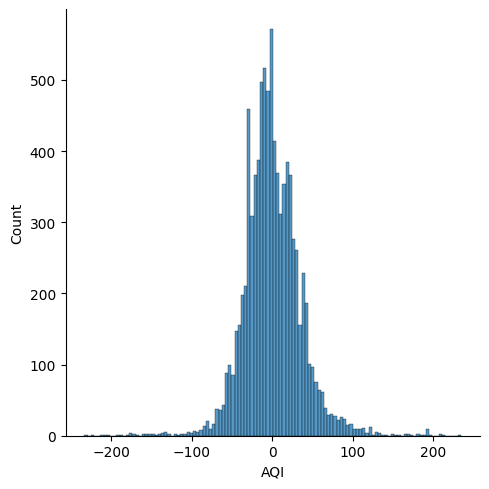

In [ ]:
sns.displot(y_test - predict)

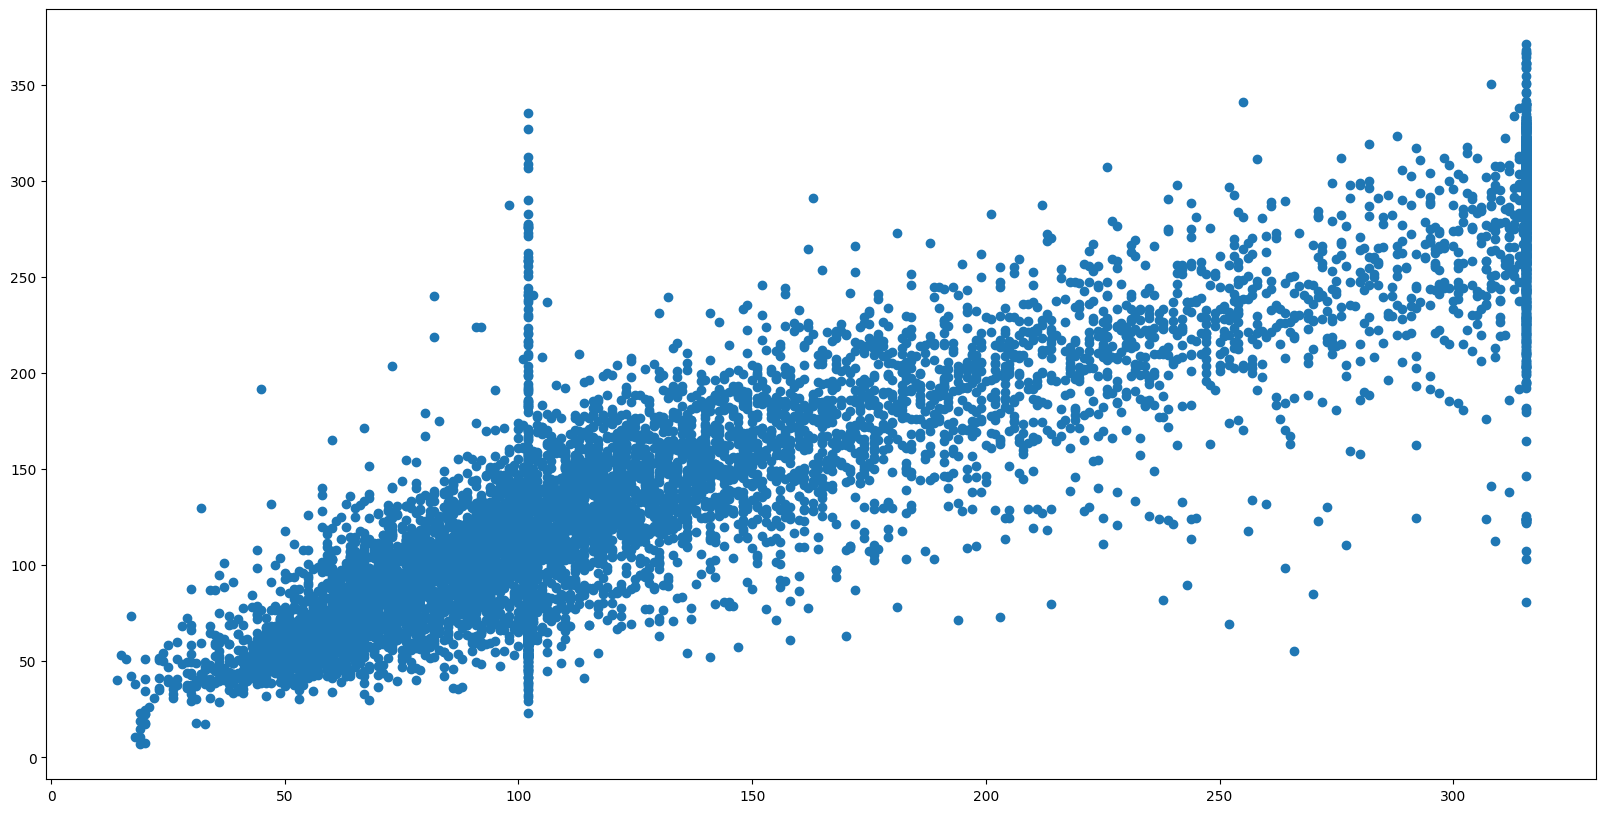

In [ ]:
plt.figure(figsize = (20,10))
plt.scatter(y_test,predict)

In [ ]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import GridSearchCV

In [ ]:
ridge = Ridge()
parameters = {'alpha' : [-14,-13,-10,0,1,25,45,12,13,16,4,3]}
ridge_regressor = GridSearchCV(ridge,parameters,scoring = 'neg_mean_squared_error',cv = 6)
ridge_regressor.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
18 fits failed out of a total of 72.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_p

GridSearchCV(cv=6, estimator=Ridge(),
             param_grid={'alpha': [-14, -13, -10, 0, 1, 25, 45, 12, 13, 16, 4,
                                   3]},
             scoring='neg_mean_squared_error')

In [ ]:
best_alpha = ridge_regressor.best_params_['alpha']
print('best_parameters:',best_alpha)
print('best_score:',ridge_regressor.best_score_)

best_parameters: 45
best_score: -2151.234240904393


In [ ]:
final_ridge = Ridge(alpha = best_alpha)
final_ridge.fit(X,y)

Ridge(alpha=45)

In [ ]:
lasso = Lasso()
parameters = {'alpha' : [-1,-3,-10,0,1,5,55,12,23,16,4,3]}
lasso_regressor = GridSearchCV(lasso,parameters,scoring = 'neg_mean_squared_error',cv = 6)
lasso_regressor.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.416e+07, tolerance: 1.630e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

GridSearchCV(cv=6, estimator=Lasso(),
             param_grid={'alpha': [-1, -3, -10, 0, 1, 5, 55, 12, 23, 16, 4, 3]},
             scoring='neg_mean_squared_error')

In [ ]:
lasso_best_alpha = lasso_regressor.best_params_['alpha']
print('best_parameters:',lasso_best_alpha)
print('best_score:',lasso_regressor.best_score_)

best_parameters: 1
best_score: -2109.077363778313


In [ ]:
final_lasso = Lasso(alpha = lasso_best_alpha)
final_lasso.fit(X,y)

Lasso(alpha=1)

In [ ]:
lasso_predict = final_lasso.predict(X_test)
lasso_predict

array([ 68.42845061,  68.42845061, 146.86540202, ..., 108.64961854,
        65.36955301, 116.95431047])

In [ ]:
ridge_predict = final_ridge.predict(X_test)
ridge_predict

array([ 80.9426225 ,  80.9426225 , 155.44832097, ..., 102.70798497,
        66.40251243, 119.51019765])

In [ ]:
import pickle
file = open('regression_model.pkl','wb')
pickle.dump(linear_regressor,file)

import pickle
file1 = open('final_lasso.pkl','wb')
pickle.dump(lasso,file1)

import pickle
file2 = open('final_ridge.pkl','wb')
pickle.dump(ridge,file2)